In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers

In [13]:
df = pd.read_csv('/content/fbmklci30.csv')
df = df.dropna()
df

,Date,^KLSE;1=9,5183.KL,4707.KL,5225.KL,5347.KL,1082.KL,1155.KL,1295.KL,7277.KL,3816.KL,3034.KL,1961.KL,5285.KL,5296.KL,5819.KL,3182.KL,8869.KL,1066.KL,5681.KL,6947.KL,6888.KL,4715.KL,6033.KL,4197.KL,5168.KL,2445.KL,4863.KL,1023.KL,7113.KL,4065.KL,6012.KL
2648,2020-10-26,1494.609985,5.710725,138.873596,5.061798,9.391359,13.963120,6.425791,2.992509,3.638396,6.428641,6.882393,4.268185,4.784060,1.731998,14.388203,2.950389,2.759269,4.095115,16.505829,3.715664,2.715770,1.955762,15.412571,2.368643,15.631191,21.935061,4.101107,2.942087,7.860103,18.834280,4.755188
2649,2020-10-27,1500.349976,5.663136,138.580200,5.111423,9.316002,14.289630,6.416715,2.996321,3.638396,6.400362,6.882393,4.297419,4.687801,1.722101,14.368994,2.940555,2.774184,4.066873,16.660089,3.744320,2.774384,1.975222,15.335986,2.349067,16.161663,21.798576,4.120636,2.942087,8.049829,18.814560,4.784124
2650,2020-10-28,1495.199951,5.663136,137.504440,5.061798,9.212385,14.116772,6.416715,2.988696,3.628562,6.362658,6.882393,4.248695,4.668550,1.741896,14.368994,2.930720,2.789099,4.057458,16.679367,3.725216,2.969764,1.965492,15.297694,2.368643,15.931790,21.837572,4.101107,2.903375,7.932379,18.932890,4.745543
2651,2020-10-30,1466.890015,5.567957,136.330826,4.932771,8.986316,13.540578,6.353183,2.874333,3.638396,6.211839,6.882393,4.190228,4.658924,1.731998,14.215314,2.911051,2.729438,3.982146,16.621523,3.601042,2.862305,1.946032,15.067942,2.358855,15.914108,20.687199,4.091342,2.854985,7.742652,18.538452,4.629798
2652,2020-11-02,1466.459961,5.672654,136.722031,5.022097,9.042833,13.463752,6.362259,2.843836,3.540061,6.145855,6.854226,4.229206,4.697428,1.692410,14.196105,2.930720,2.764240,4.076286,16.486547,3.658353,2.930688,1.946032,15.125381,2.427369,15.772651,21.252638,4.091342,2.806596,7.580030,18.242628,4.668380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2021-11-24,1522.270020,8.240832,133.500000,6.690000,9.440000,17.280001,8.120000,4.070000,2.620406,6.747667,7.404808,3.770000,3.880000,3.563407,18.280001,4.920000,5.650000,5.310000,19.797979,4.180000,3.970000,3.050000,16.085369,2.210000,5.150000,20.799999,5.590000,5.190000,2.270000,17.320000,4.548555
2914,2021-11-25,1517.599976,8.339643,133.800003,6.670000,9.380000,17.299999,8.110000,4.020000,2.620406,6.698197,7.375769,3.780000,3.860000,3.553426,18.320000,4.940000,5.640000,5.330000,19.698990,4.180000,4.000000,3.010000,16.124939,2.210000,5.130000,20.900000,5.430000,5.170000,2.250000,17.260000,4.548555
2915,2021-11-26,1512.219971,8.329762,134.000000,6.560000,9.380000,17.299999,8.100000,4.000000,2.541000,6.549788,7.356411,3.750000,3.730000,3.513500,18.299999,4.720000,5.570000,5.260000,19.698990,4.150000,3.900000,2.930000,16.184296,2.230000,5.650000,20.559999,5.420000,5.100000,2.640000,17.020000,4.479187
2916,2021-11-29,1510.569946,8.112378,134.000000,6.600000,9.260000,17.240000,8.050000,3.960000,2.550926,6.579470,7.404808,3.640000,3.680000,3.500000,18.200001,4.580000,5.230000,5.260000,19.501011,4.130000,3.980000,2.860000,16.124939,2.200000,6.400000,20.139999,5.390000,5.110000,3.190000,17.000000,4.390000


In [14]:
df.isna().sum()

Date         0
^KLSE;1=9    0
5183.KL      0
4707.KL      0
5225.KL      0
5347.KL      0
1082.KL      0
1155.KL      0
1295.KL      0
7277.KL      0
3816.KL      0
3034.KL      0
1961.KL      0
5285.KL      0
5296.KL      0
5819.KL      0
3182.KL      0
8869.KL      0
1066.KL      0
5681.KL      0
6947.KL      0
6888.KL      0
4715.KL      0
6033.KL      0
4197.KL      0
5168.KL      0
2445.KL      0
4863.KL      0
1023.KL      0
7113.KL      0
4065.KL      0
6012.KL      0
dtype: int64

In [15]:
stocks_data = df.iloc[ : , 2:]
stocks_data.head()

,5183.KL,4707.KL,5225.KL,5347.KL,1082.KL,1155.KL,1295.KL,7277.KL,3816.KL,3034.KL,1961.KL,5285.KL,5296.KL,5819.KL,3182.KL,8869.KL,1066.KL,5681.KL,6947.KL,6888.KL,4715.KL,6033.KL,4197.KL,5168.KL,2445.KL,4863.KL,1023.KL,7113.KL,4065.KL,6012.KL
2648,5.710725,138.873596,5.061798,9.391359,13.963120,6.425791,2.992509,3.638396,6.428641,6.882393,4.268185,4.784060,1.731998,14.388203,2.950389,2.759269,4.095115,16.505829,3.715664,2.715770,1.955762,15.412571,2.368643,15.631191,21.935061,4.101107,2.942087,7.860103,18.834280,4.755188
2649,5.663136,138.580200,5.111423,9.316002,14.289630,6.416715,2.996321,3.638396,6.400362,6.882393,4.297419,4.687801,1.722101,14.368994,2.940555,2.774184,4.066873,16.660089,3.744320,2.774384,1.975222,15.335986,2.349067,16.161663,21.798576,4.120636,2.942087,8.049829,18.814560,4.784124
2650,5.663136,137.504440,5.061798,9.212385,14.116772,6.416715,2.988696,3.628562,6.362658,6.882393,4.248695,4.668550,1.741896,14.368994,2.930720,2.789099,4.057458,16.679367,3.725216,2.969764,1.965492,15.297694,2.368643,15.931790,21.837572,4.101107,2.903375,7.932379,18.932890,4.745543
2651,5.567957,136.330826,4.932771,8.986316,13.540578,6.353183,2.874333,3.638396,6.211839,6.882393,4.190228,4.658924,1.731998,14.215314,2.911051,2.729438,3.982146,16.621523,3.601042,2.862305,1.946032,15.067942,2.358855,15.914108,20.687199,4.091342,2.854985,7.742652,18.538452,4.629798
2652,5.672654,136.722031,5.022097,9.042833,13.463752,6.362259,2.843836,3.540061,6.145855,6.854226,4.229206,4.697428,1.692410,14.196105,2.930720,2.764240,4.076286,16.486547,3.658353,2.930688,1.946032,15.125381,2.427369,15.772651,21.252638,4.091342,2.806596,7.580030,18.242628,4.668380


In [16]:
index_data = df.iloc[ : , 1]
index_data.head()

2648    1494.609985
2649    1500.349976
2650    1495.199951
2651    1466.890015
2652    1466.459961
Name: ^KLSE;1=9, dtype: float64

In [17]:
assets_names = stocks_data.columns.values
data_assets = stocks_data
data_index = index_data

In [18]:
print("Stocks data (time series) shape: {shape}".format(shape=stocks_data.shape))
print("Index data (time series) shape: {shape}".format(shape=index_data.shape))

Stocks data (time series) shape: (270, 30)
Index data (time series) shape: (270,)


In [19]:
stocks_data.head()

,5183.KL,4707.KL,5225.KL,5347.KL,1082.KL,1155.KL,1295.KL,7277.KL,3816.KL,3034.KL,1961.KL,5285.KL,5296.KL,5819.KL,3182.KL,8869.KL,1066.KL,5681.KL,6947.KL,6888.KL,4715.KL,6033.KL,4197.KL,5168.KL,2445.KL,4863.KL,1023.KL,7113.KL,4065.KL,6012.KL
2648,5.710725,138.873596,5.061798,9.391359,13.963120,6.425791,2.992509,3.638396,6.428641,6.882393,4.268185,4.784060,1.731998,14.388203,2.950389,2.759269,4.095115,16.505829,3.715664,2.715770,1.955762,15.412571,2.368643,15.631191,21.935061,4.101107,2.942087,7.860103,18.834280,4.755188
2649,5.663136,138.580200,5.111423,9.316002,14.289630,6.416715,2.996321,3.638396,6.400362,6.882393,4.297419,4.687801,1.722101,14.368994,2.940555,2.774184,4.066873,16.660089,3.744320,2.774384,1.975222,15.335986,2.349067,16.161663,21.798576,4.120636,2.942087,8.049829,18.814560,4.784124
2650,5.663136,137.504440,5.061798,9.212385,14.116772,6.416715,2.988696,3.628562,6.362658,6.882393,4.248695,4.668550,1.741896,14.368994,2.930720,2.789099,4.057458,16.679367,3.725216,2.969764,1.965492,15.297694,2.368643,15.931790,21.837572,4.101107,2.903375,7.932379,18.932890,4.745543
2651,5.567957,136.330826,4.932771,8.986316,13.540578,6.353183,2.874333,3.638396,6.211839,6.882393,4.190228,4.658924,1.731998,14.215314,2.911051,2.729438,3.982146,16.621523,3.601042,2.862305,1.946032,15.067942,2.358855,15.914108,20.687199,4.091342,2.854985,7.742652,18.538452,4.629798
2652,5.672654,136.722031,5.022097,9.042833,13.463752,6.362259,2.843836,3.540061,6.145855,6.854226,4.229206,4.697428,1.692410,14.196105,2.930720,2.764240,4.076286,16.486547,3.658353,2.930688,1.946032,15.125381,2.427369,15.772651,21.252638,4.091342,2.806596,7.580030,18.242628,4.668380


In [20]:
# Split data
n_train = int(data_assets.shape[0]*0.8)

In [21]:
# Stocks data
X_train = data_assets.values[:n_train, :]
X_test = data_assets.values[n_train:, :]

In [22]:
# Index data
index_train = data_index[:n_train]
index_test = data_index[n_train:]

In [23]:
# Normalize data
scaler = MinMaxScaler([0, 1])

In [24]:
# Stocks data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
# Index data
scaler_index = MinMaxScaler([0, 1])
index_train = scaler_index.fit_transform(index_train[:, np.newaxis])
index_test = scaler_index.fit_transform(index_test[:, np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


Autoencoder - Keras

In [26]:
# Network hyperparameters
n_inputs = X_train.shape[1]

In [27]:
# Training hyperparameters
epochs = 50
batch_size = 1

In [28]:
# Define model
input = Input(shape=(n_inputs,))
# Encoder Layers
encoded = Dense(8, input_shape=(n_inputs,), activation='relu')(input)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(n_inputs, activation='sigmoid')(decoded)

In [29]:
# Encoder
encoder = Model(input, encoded)

# Autoencoder
model = Model(input, decoded)

In [30]:
# Compile autoencoder
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 8)                 248       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 30)                270       
                                                                 
Total params: 594
Trainable params: 594
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fit the model
history = model.fit(X_train, X_train,epochs=epochs,batch_size=batch_size,shuffle=True,verbose=1)

Epoch 1/50
216/216 [==============================] - 2s 2ms/step - loss: 0.0542
Epoch 2/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0366
Epoch 3/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0325
Epoch 4/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0290
Epoch 5/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0249
Epoch 6/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0208
Epoch 7/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0190
Epoch 8/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0179
Epoch 9/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0172
Epoch 10/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0165
Epoch 11/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 12/50
216/216 [==============================] - 1s 2ms/step - loss: 0.0154
Epoch 13/50
216/216 [====

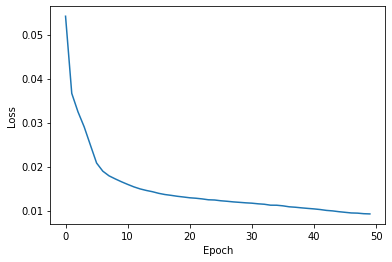

In [32]:
# Visualize loss history
plt.figure()
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [33]:
# Evaluate model
score_train = model.evaluate(X_train, X_train, batch_size=batch_size)
score_test = model.evaluate(X_test, X_test, batch_size=batch_size)

54/54 [==============================] - 0s 2ms/step - loss: 0.0615


In [34]:
print('Training MSE: %.8f' %score_train)
print('Testing MSE: %.8f' %score_test)

Training MSE: 0.00906087
Testing MSE: 0.06146298


In [35]:
# Obtain reconstruction of the stocks
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

In [36]:
error = np.mean(np.abs(X_train - X_train_pred)**2, axis=0)
print('Training MSE: %.8f' %np.mean(error))

Training MSE: 0.00906087


In [37]:
error_test = np.mean(np.abs(X_test - X_test_pred)**2, axis=0)
print('Testing MSE: %.8f' %np.mean(error_test))

Testing MSE: 0.06146298


In [38]:
# Sort stocks by reconstruction error
ind = np.argsort(error)
sort_error = error[ind]
sort_assets_names = assets_names[ind]

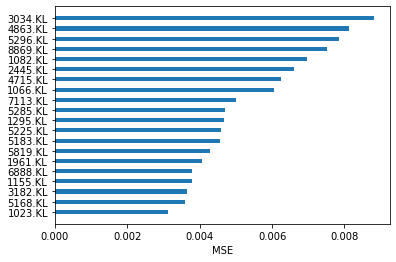

In [39]:
# Barplot
plt.figure()
plt.barh(2*np.arange(len(error[:20])), error[ind[:20]], tick_label=assets_names[ind[:20]])
plt.xlabel('MSE')
plt.show()

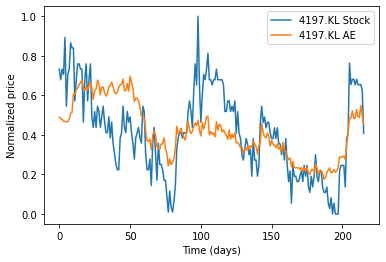

In [40]:
# Plot stock
i=-1
plt.figure()
plt.plot(X_train[:, ind[i]], label=assets_names[ind[i]] + ' Stock')
plt.plot(X_train_pred[:, ind[i]], label=assets_names[ind[i]] + ' AE')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()

In [41]:
# Identify stocks
n = 5

portfolio_train = X_train_pred[:, ind[:n]]
portfolio_test = X_test_pred[:, ind[:n]]

In [42]:
# Create portfolio in-sample
tracked_index_insample = np.mean(portfolio_train, axis=1)

In [43]:
# Create portfolio out-sample
tracked_index_outofsample = np.mean(portfolio_test, axis=1)

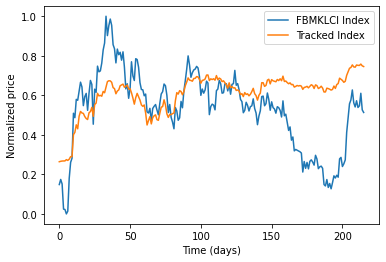

In [45]:
# In-sample
plt.figure()
plt.plot(index_train, label='FBMKLCI Index')
plt.plot(tracked_index_insample, label='Tracked Index')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()

In [46]:
# Correlation coefficient (in-sample)
corr_train = np.corrcoef(index_train.squeeze(), tracked_index_insample)[0, 1]
print('Correlation coefficient (in-sample): %.8f' %corr_train)

Correlation coefficient (in-sample): 0.31504229


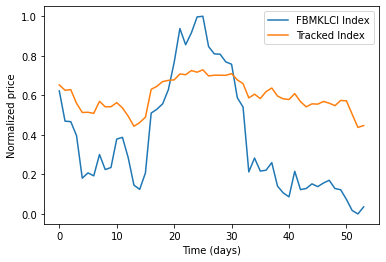

In [72]:
# Plot tracked index (out-of-sample)
plt.figure()
plt.plot(index_test, label='FBMKLCI Index')
plt.plot(tracked_index_outofsample, label='Tracked Index')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()

In [48]:
# Correlation coefficient (out-of-sample)
corr_test = np.corrcoef(index_test.squeeze(), tracked_index_outofsample)[0, 1]
print('Correlation coefficient: %.8f' %corr_test)

Correlation coefficient: 0.94327039


In [49]:
# Generate corrupted series by adding noise with normal distribution
noise_factor = 0.05
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [50]:
# Clip corrupter data
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

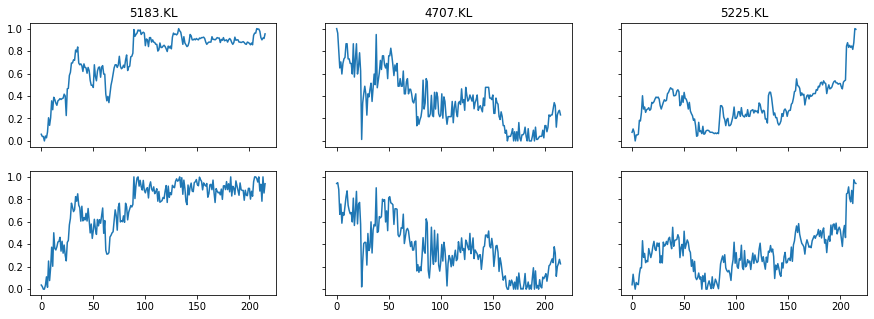

In [51]:
# Visualize corrupted data
f, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,5))

# Asset 1
axarr[0,0].plot(X_train[:, 0])
axarr[0,0].set_title(assets_names[0])
axarr[1,0].plot(X_train_noisy[:, 0])

# Asset 2
axarr[0,1].plot(X_train[:, 1])
axarr[0,1].set_title(assets_names[1])
axarr[1,1].plot(X_train_noisy[:, 1])

# Asset 3
axarr[0,2].plot(X_train[:, 2])
axarr[0,2].set_title(assets_names[2])
axarr[1,2].plot(X_train_noisy[:, 2])

plt.show()

Autoencoder - Keras

In [52]:
# Network hyperparameters
n_inputs = X_train.shape[1]

In [53]:
# Training hyperparameters
epochs = 50
batch_size = 1

# Define model
input = Input(shape=(n_inputs,))
# Encoder Layers
encoded = Dense(8, input_shape=(n_inputs,), activation='relu')(input)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(n_inputs, activation='sigmoid')(decoded)

In [54]:
# Encoder
encoder = Model(input, encoded)

# Autoencoder
model = Model(input, decoded)

In [55]:
# Compile autoencoder
model.compile(loss='mse', optimizer='adam')
model.summary()

# Fit the model
history = model.fit(X_train_noisy, X_train,epochs=epochs,batch_size=batch_size,shuffle=True,verbose=1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_4 (Dense)             (None, 8)                 248       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 30)                270       
                                                                 
Total params: 594
Trainable params: 594
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
216/216 [==============================] - 1s 3ms/

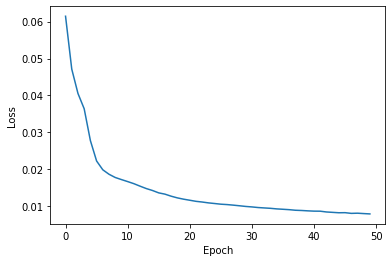

In [56]:
# Visualize loss history
plt.figure()
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [57]:
# Evaluate model
score_train = model.evaluate(X_train_noisy, X_train, batch_size=batch_size)
score_test = model.evaluate(X_test_noisy, X_test, batch_size=batch_size)

54/54 [==============================] - 0s 2ms/step - loss: 0.0723


In [58]:
print('Training MSE: %.8f' %score_train)
print('Testing MSE: %.8f' %score_test)

Training MSE: 0.00759874
Testing MSE: 0.07232555


In [59]:
# Obtain reconstruction of the stocks
X_train_pred = model.predict(X_train_noisy)
X_test_pred = model.predict(X_test_noisy)

In [60]:
error = np.mean(np.abs(X_train - X_train_pred)**2, axis=0)
print('Training MSE: %.8f' %np.mean(error))

error_test = np.mean(np.abs(X_test - X_test_pred)**2, axis=0)
print('Testing MSE: %.8f' %np.mean(error_test))

Training MSE: 0.00759874
Testing MSE: 0.07232556


In [61]:
# Sort stocks by reconstruction error
ind = np.argsort(error)
sort_error = error[ind]
sort_assets_names = assets_names[ind]

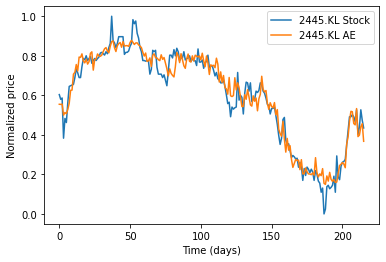

In [62]:
# Plot
i = 0
plt.figure()
plt.plot(X_train[:, ind[i]], label=assets_names[ind[i]] + ' Stock')
plt.plot(X_train_pred[:, ind[i]], label=assets_names[ind[i]] + ' AE')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()

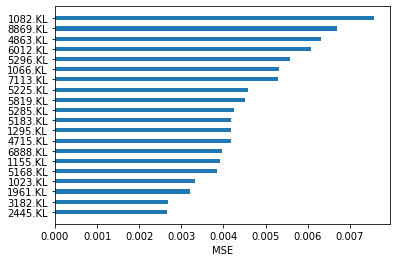

In [63]:
# Barplot
plt.figure()
plt.barh(2*np.arange(len(error[:20])), error[ind[:20]], tick_label=assets_names[ind[:20]])
plt.xlabel('MSE')
#plt.xticks(rotation=25)
plt.show()

In [64]:
# Identify stocks
n = 5

portfolio_train = X_train_pred[:, ind[:n]]
portfolio_test = X_test_pred[:, ind[:n]]

# Create portfolio in-sample
tracked_index_insample = np.mean(portfolio_train, axis=1)

# Create portfolio out-sample
tracked_index_outofsample = np.mean(portfolio_test, axis=1)

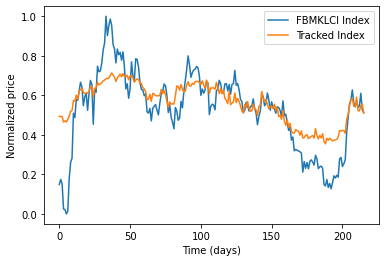

In [69]:
# In-sample
plt.figure()
plt.plot(index_train, label='FBMKLCI Index')
plt.plot(tracked_index_insample, label='Tracked Index')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()

In [70]:
# Correlation coefficient (in-sample)
corr_train = np.corrcoef(index_train.squeeze(), tracked_index_insample)[0, 1]
print('Correlation coefficient (in-sample): %.8f' %corr_train)

Correlation coefficient (in-sample): 0.87688779


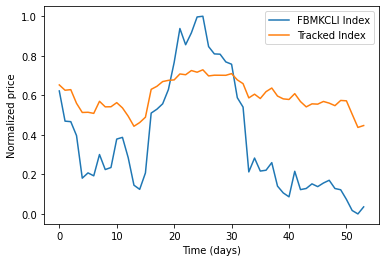

In [73]:
# Plot tracked index (out-of-sample)
plt.figure()
plt.plot(index_test, label='FBMKCLI Index')
plt.plot(tracked_index_outofsample, label='Tracked Index')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()

In [71]:
# Correlation coefficient (out-of-sample)
corr_test = np.corrcoef(index_test.squeeze(), tracked_index_outofsample)[0, 1]
print('Correlation coefficient: %.8f' %corr_test)

Correlation coefficient: 0.87060934
